# Suspicious Email Detection

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelEncoder



In [4]:
def load_dataset(file_path):

    return pd.read_csv(file_path)

# Email Text Preprocessing

Email text preprocessing is the process of cleaning and transforming raw email text data into a format that is suitable for analysis or machine learning tasks. The goal is to extract meaningful information, reduce noise, and standardize the text. Here are some of the key email text preprocessing steps:

1. **Lowercasing:**
2. **Removing Stopwords:**
3. **Lemmatization:**  
4. **Handling Missing Values:**
   

The combination of these preprocessing steps results in a clean and standardized representation of email text data, suitable for various natural language processing (NLP) tasks or machine learning models.


In [5]:
class TextPreprocessor(TransformerMixin):
    def transform(self, X, **transform_params):
        X = X.apply(self.clean_text)
        return X

    def fit(self, X, y=None, **fit_params):
        return self

    def clean_text(self, text):
        text = text.lower()
        text = ''.join([char for char in text if char.isalpha() or char.isspace()])
        text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
        return text

def preprocess_data(df):
    df = df.dropna()
    features = df[['Email Text']].copy()
    preprocessor = TextPreprocessor()
    features['Email Text'] = preprocessor.fit_transform(features['Email Text'])
    return features, df['Email Type']

## Training and Testing
We split our preprocessed data into two main subsets:

### Training Set
The training set is used to train our machine learning models. It consists of a portion of the preprocessed data on which the models learn to recognize patterns and make predictions. During training, the models adjust their parameters based on the features in the training set to minimize the difference between predicted and actual outcomes.

### Testing Set
The testing set is reserved for evaluating the models' performance. It contains data that the models have not seen during training. By making predictions on the testing set, we can assess how well the models generalize to new, unseen email text.

## Evaluation Metrics
Common evaluation metrics include accuracy, precision, recall, and F1 score. These metrics provide insights into different aspects of the model's performance, such as how often it makes correct predictions and how well it identifies relevant instances.
## Split Ratio
We typically follow a common split ratio, allocating approximately 80% of the preprocessed data to the training set and 20% to the testing set. Adjusting the split ratio may be necessary depending on the dataset size and specific requirements.



In [6]:
def train_nb_model(X_train, y_train):
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    nb_model = MultinomialNB()
    nb_model.fit(X_train_vectorized, y_train)
    return nb_model, vectorizer

def train_rf_model(X_train, y_train):
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_vectorized, y_train)
    return rf_model, vectorizer

def train_svm_model(X_train, y_train):
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    svm_model = SVC(probability=True)
    svm_model.fit(X_train_vectorized, y_train)
    return svm_model, vectorizer

In [7]:
from sklearn.metrics import f1_score, precision_score

def evaluate_model(model, X_test, y_test, df):
    y_pred = model.predict(X_test)
    label_encoder = LabelEncoder()
    y_test_encoded = label_encoder.fit_transform(y_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Phishing Email')  # Calculate Precision
    f1 = f1_score(y_test, y_pred, pos_label='Phishing Email')  # Calculate F1 score
    
    print(f"Accuracy: {accuracy:.2f}")
    print("Precision:", precision)
    print("F1 Score:", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Email Type'].unique(), yticklabels=df['Email Type'].unique())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    return accuracy, precision, f1, roc_auc


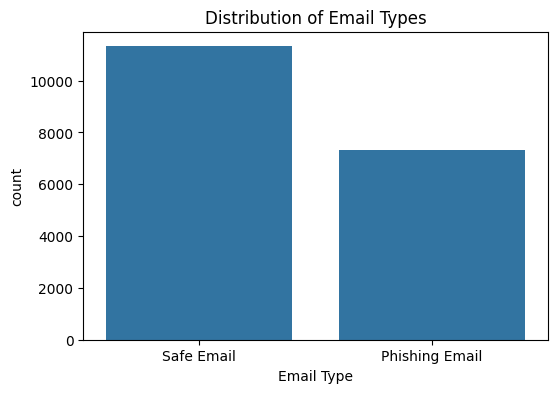

In [8]:
file_path = "Phishing_Email.csv"
df = load_dataset(file_path)

X, y = preprocess_data(df)


plt.figure(figsize=(6, 4))
sns.countplot(x='Email Type', data=df)
plt.title('Distribution of Email Types')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X['Email Text'], y, test_size=0.2, random_state=42)

# Naive Bayes (NB)

Naive Bayes is a probabilistic machine learning algorithm widely used for classifying emails, especially in the context of phishing detection. It calculates the probability that an email belongs to a particular class (phishing or not) based on the occurrence of specific words and features. Despite its "naive" assumption of feature independence, Naive Bayes performs well in detecting phishing emails due to its efficiency in handling high-dimensional data and fast training speeds.


In [9]:
nb_model, nb_vectorizer = train_nb_model(X_train, y_train)

Naive Bayes Model Evaluation:
Accuracy: 0.95
Precision: 0.9601921757035004
F1 Score: 0.9405042016806724

Classification Report:
                 precision    recall  f1-score   support

Phishing Email       0.96      0.92      0.94      1518
    Safe Email       0.95      0.97      0.96      2209

      accuracy                           0.95      3727
     macro avg       0.95      0.95      0.95      3727
  weighted avg       0.95      0.95      0.95      3727



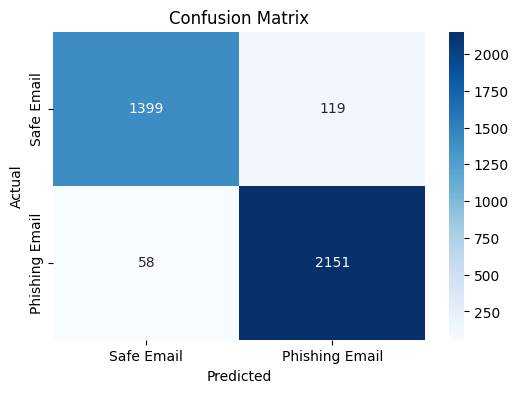

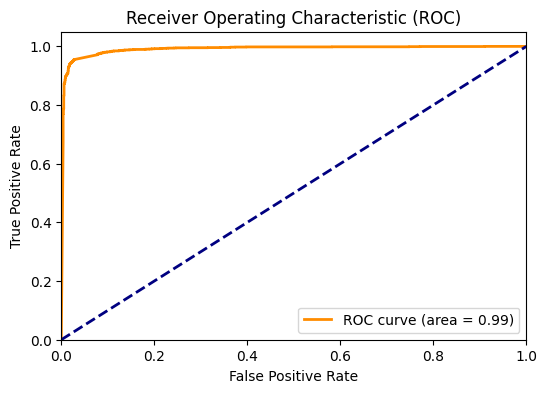

ROC-AUC: 0.9901331897119879


In [10]:
print("Naive Bayes Model Evaluation:")
nb_accuracy, nb_precision, nb_f1, nb_roc_auc = evaluate_model(nb_model, nb_vectorizer.transform(X_test), y_test, df)
print("ROC-AUC:", nb_roc_auc)


# Random Forest (RF)

Random Forest is a robust ensemble learning algorithm that excels in classifying phishing emails. By constructing multiple decision trees during training and combining their predictions, Random Forest can effectively capture complex patterns and relationships in email text. Its ability to handle overfitting and its versatility make it a suitable choice for phishing email detection, where the model needs to generalize well to unseen instances.


In [11]:
rf_model, rf_vectorizer = train_rf_model(X_train, y_train)


Random Forest Model Evaluation:
Accuracy: 0.97
Precision: 0.9565217391304348
F1 Score: 0.9637136319058516

Classification Report:
                 precision    recall  f1-score   support

Phishing Email       0.96      0.97      0.96      1518
    Safe Email       0.98      0.97      0.97      2209

      accuracy                           0.97      3727
     macro avg       0.97      0.97      0.97      3727
  weighted avg       0.97      0.97      0.97      3727



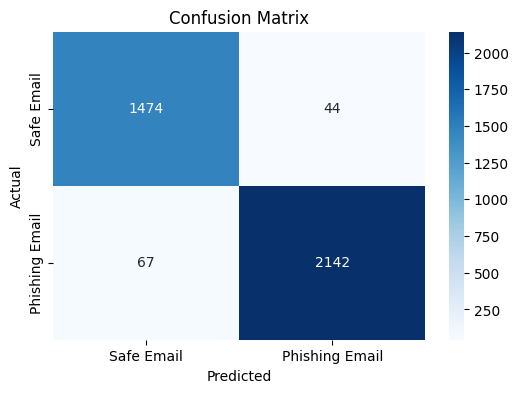

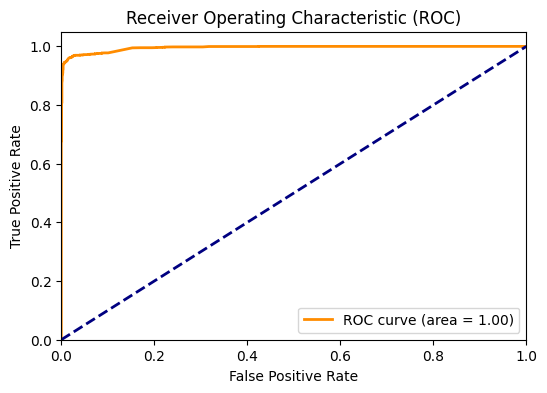

ROC-AUC: 0.9951998978904721


In [12]:
print("\nRandom Forest Model Evaluation:")
rf_accuracy, rf_precision, rf_f1, rf_roc_auc = evaluate_model(rf_model, rf_vectorizer.transform(X_test), y_test, df)
print("ROC-AUC:", rf_roc_auc)


# Support Vector Machine (SVM)

Support Vector Machine (SVM) is a powerful classification algorithm known for its effectiveness in identifying patterns in data. When applied to phishing email detection, SVM seeks an optimal hyperplane to separate phishing emails from legitimate ones. This method proves beneficial in scenarios where the relationships between features are intricate. SVM's ability to find optimal decision boundaries makes it well-suited for the nuanced patterns often found in phishing email content.


In [13]:
svm_model, svm_vectorizer = train_svm_model(X_train, y_train)


SVM Model Evaluation:
Accuracy: 0.62
Precision: 0.967479674796748
F1 Score: 0.1450335161486898

Classification Report:
                 precision    recall  f1-score   support

Phishing Email       0.97      0.08      0.15      1518
    Safe Email       0.61      1.00      0.76      2209

      accuracy                           0.62      3727
     macro avg       0.79      0.54      0.45      3727
  weighted avg       0.76      0.62      0.51      3727



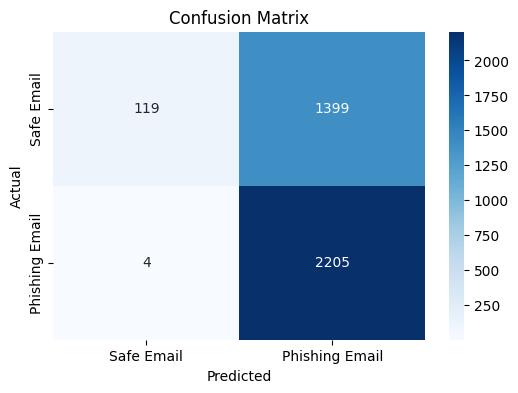

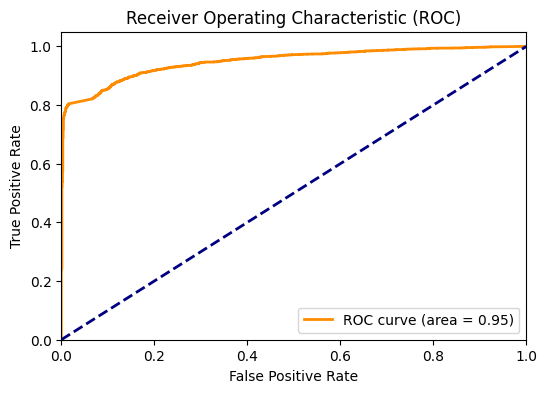

ROC-AUC: 0.948844885964771


In [14]:
print("\nSVM Model Evaluation:")
svm_accuracy, svm_precision, svm_f1, svm_roc_auc = evaluate_model(svm_model, svm_vectorizer.transform(X_test), y_test, df)
print("ROC-AUC:", svm_roc_auc)


Classifier Comparison:

Naive Bayes Accuracy: 0.9525087201502549
Random Forest Accuracy: 0.9702173329755835
SVM Accuracy: 0.6235578213039978

Naive Bayes Precision: 0.9601921757035004
Random Forest Precision: 0.9565217391304348
SVM Precision: 0.967479674796748

Naive Bayes F1 Score: 0.9405042016806724
Random Forest F1 Score: 0.9637136319058516
SVM F1 Score: 0.1450335161486898

Naive Bayes ROC-AUC: 0.9901331897119879
Random Forest ROC-AUC: 0.9951998978904721
SVM ROC-AUC: 0.948844885964771


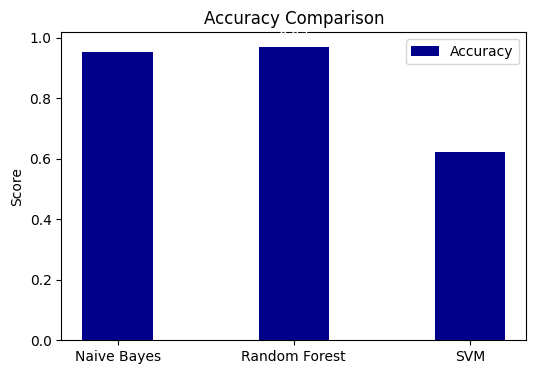

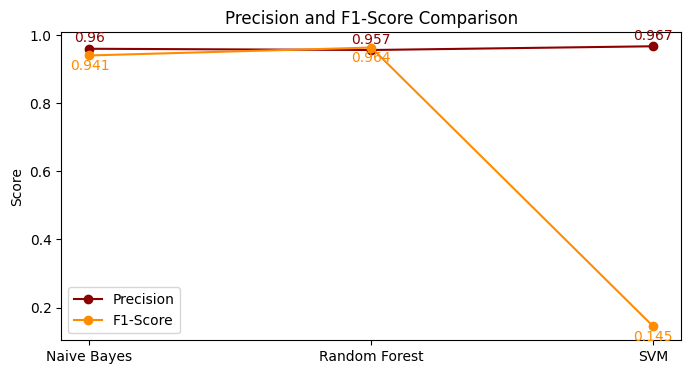

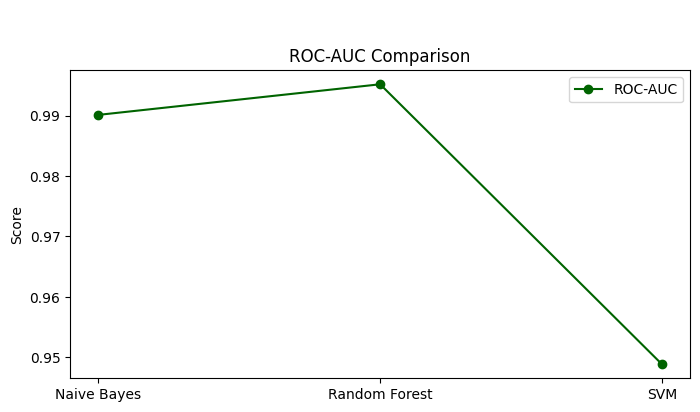

In [18]:
print("\nClassifier Comparison:\n")
print("Naive Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("\nNaive Bayes Precision:", nb_precision)
print("Random Forest Precision:", rf_precision)
print("SVM Precision:", svm_precision)
print("\nNaive Bayes F1 Score:", nb_f1)
print("Random Forest F1 Score:", rf_f1)
print("SVM F1 Score:", svm_f1)
print("\nNaive Bayes ROC-AUC:", nb_roc_auc)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("SVM ROC-AUC:", svm_roc_auc)

import numpy as np
import matplotlib.pyplot as plt

classifiers = ['Naive Bayes', 'Random Forest', 'SVM']
accuracy_values = [nb_accuracy, rf_accuracy, svm_accuracy]
precision_values = [nb_precision, rf_precision, svm_precision]
f1_values = [nb_f1, rf_f1, svm_f1]
roc_auc_values = [nb_roc_auc, rf_roc_auc, svm_roc_auc]

# Plot Accuracy
fig, ax = plt.subplots(figsize=(6, 4))
width = 0.4
x = np.arange(len(classifiers))
bars = ax.bar(x, accuracy_values, width=width, label='Accuracy', color='darkblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', color='white')

ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend()
ax.set_ylabel('Score')
plt.title('Accuracy Comparison')
plt.show()

# Plot Precision and F1-Score
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(classifiers, precision_values, marker='o', label='Precision', color='darkred')
ax.plot(classifiers, f1_values, marker='o', label='F1-Score', color='darkorange')

for i, value in enumerate(precision_values):
    plt.text(i, value + 0.01, f'{round(value, 3)}', ha='center', va='bottom', color='darkred')

for i, value in enumerate(f1_values):
    plt.text(i, value - 0.01, f'{round(value, 3)}', ha='center', va='top', color='darkorange')

ax.legend()
ax.set_ylabel('Score')
plt.title('Precision and F1-Score Comparison')
plt.show()

# Plot ROC-AUC
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(classifiers, roc_auc_values, marker='o', label='ROC-AUC', color='darkgreen')

for i, value in enumerate(roc_auc_values):
    plt.text(i, value + 0.01, round(value, 3), ha='center', va='bottom', color='white')

ax.legend()
ax.set_ylabel('Score')
plt.title('ROC-AUC Comparison')
plt.show()




# Conclusion

In this analysis, we applied three different classifiers (Naive Bayes, Random Forest, and Support Vector Machine) to detect phishing emails using a dataset loaded from "Phishing_Email.csv". The dataset was preprocessed, split into training and testing sets, and each classifier was trained using the training set. The trained models were then used to make predictions on the testing set.

## Metric Prediction

- **Accuracy:** Random Forest performed the best with an accuracy of 97.02%.
- **Precision:** Naive Bayes had the highest precision, indicating a low rate of false positives.
- **F1 Score:** Random Forest achieved the highest F1 score, balancing precision and recall effectively.
- **ROC-AUC:** Random Forest also excelled in ROC-AUC, indicating strong overall performance.

## Recommendations:

- Random Forest is recommended for its balanced performance across multiple metrics.
- Naive Bayes is a suitable alternative with high precision and overall good performance.
- SVM shows limitations, especially in terms of F1 score, suggesting challenges in balancing precision and recall for phishing email detection.

This report provides insights into the strengths and weaknesses of each model, guiding the choice of the most suitable classifier for the specific task of phishing email detection.


<div align="left" style="font-family: 'Arial', sans-serif; color: #66a3ff;">

# Submitted by -
Ananya Thakur 21052225  
Tanmay Pandey 21052231  
CSE 12

</div>
